In [20]:
import geopandas as gpd
import pandas as pd
import numpy as np

In [36]:
import geopandas as gpd
PATH_DATASET = "datasets/"
K_LAT = 111.134861111
K_LON = 64.87434

def get_items_by_radius(df, center, radius):
    """
    !Важно для быстрого поиска используется поиск не по радиусу а по квадрату
    df - Pandas DataFrame, где объекты имеют колонки долготу "lon" и широту "lat"
    center - центральная точка от которой будут искаться объекты в радиусе
    radius - радиус от центра в км
    """
    assert center[0] < center[1], "Перепутаны местами долгота широта у `center`, сначала долготу 37.ххх, затем широту 55.ххх"
    min_lon = center[0] - radius/K_LON
    max_lon = center[0] + radius/K_LON
    min_lat = center[1] - radius/K_LAT
    max_lat = center[1] + radius/K_LAT
    return df[(df.lat >= min_lat)&(df.lat <= max_lat)&(df.lon >= min_lon)&(df.lon <= max_lon)]

def get_items_by_frame(df, p1, p2):
    """
    df - Pandas DataFrame, где объекты имеют колонки долготу "lon" и широту "lat"
    p1, p2 - координаты противолежаших углов (вершин) квадрата (фрейма)
    """
    assert (p1[0] < p1[1])and(p2[0] < p2[1]), "Перепутаны местами долгота широта в `p1`,`p2` , сначала долготу 37.ххх, затем широту 55.ххх"
    min_lon, max_lon = min(p1[0],p2[0]), max(p1[0],p2[0])
    min_lat, max_lat = min(p1[1],p2[1]), max(p1[1],p2[1])
    return df[(df.lat >= min_lat)&(df.lat <=max_lat)&(df.lon >= min_lon)&(df.lon<=max_lon)]

objects = gpd.read_file(PATH_DATASET + "objects_dataset.json", driver="GeoJSON") 

print(objects.shape)
point = (objects.iloc[42].lon, objects.iloc[42].lat)

select_objects = get_items_by_radius(objects, center=point, radius=3)
print(select_objects.shape)

(26001, 44)
(1547, 44)


<AxesSubplot:>

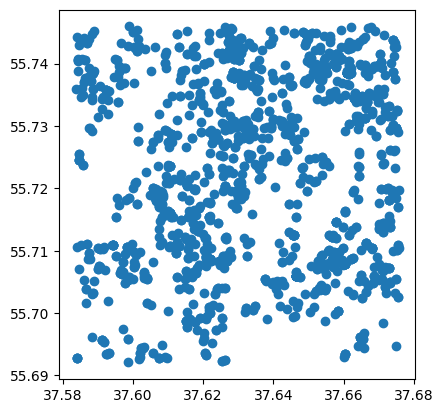

In [37]:
select_objects.plot()

In [23]:
# test2 = gpd.read_file(PATH_DATASET + "predict_postamats.json", driver="GeoJSON") 

# test2 = geopandas.read_file(PATH_DATASET + "moscow_regions_base2.geojson", encoding='utf-8')
# test2.okato = test2.okato.astype(np.int64)

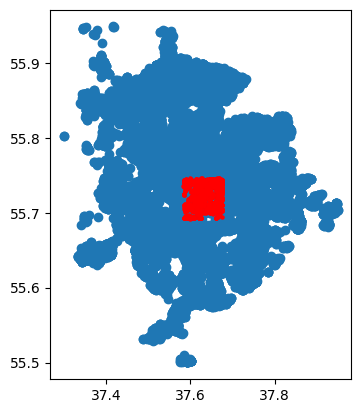

In [38]:
base_plot = objects.plot()
# base = boundaries.plot(figsize=(40,40))
select_objects.plot(ax=base_plot, marker='o', color='red', markersize=5);


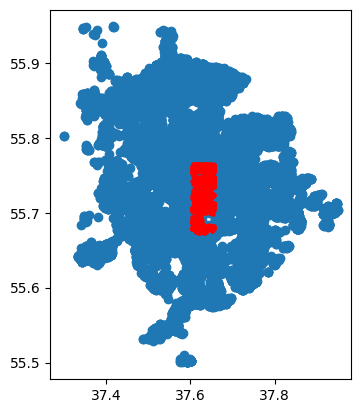

In [30]:
base_plot = objects.plot()
# base = boundaries.plot(figsize=(40,40))
select_objects.plot(ax=base_plot, marker='o', color='red', markersize=5);
